
# Prosper Loan Data Exploration
## What factors affect the Borrower's APR?


## Investigation Overview

> In this project I have mainly analyse factors that affect the borrower’s APR. Mainly to uncover how individual's Borrower APR changes with Prosper score, Loan amount, Employment status, thier Current credit lines, Current delinquencies and Total inquiry. 



## Dataset Overview

> This data set contains 113,937 rows with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
> Here is a small description of the features I have chosen.
>1. Term : The length of the loan expressed in months.
>2. LoanStatus : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
>3. BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.
>4. ProsperScore : A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.


>5. ListingCategory : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
>6. EmploymentStatus : The employment status of the borrower at the time they posted the listing.
>7. IsBorrowerHomeowner : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
>8. CurrentCreditLines : Number of current credit lines at the time the credit profile was pulled.
>9. CurrentDeliquencies : Number of accounts delinquent at the time the credit profile was pulled.
>10. TotalInquiries : Total number of inquiries at the time the credit profile was pulled.
>11. IncomeRange : The income range of the borrower at the time the listing was created.
>12. OpenRevolvingAccounts: Number of open revolving accounts at the time the credit profile was pulled.
>13. The origination amount of the loan.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData (1).csv')

In [17]:
#Create a list to store necessary columns name
col = ['ListingNumber','Term','LoanStatus','ProsperScore','BorrowerAPR','ListingCategory (numeric)','EmploymentStatus','IsBorrowerHomeowner','CurrentCreditLines','LoanOriginalAmount','CurrentDelinquencies','OpenRevolvingAccounts','TotalInquiries','IncomeRange']

In [18]:
#Select features from prosper data in the col list
df_prosper_loan = prosper_loan[col]

In [19]:
#Change 'ListingCategory (numeric)' name to ListingCategory
df_prosper_loan = df_prosper_loan.rename(columns={"ListingCategory (numeric)": "ListingCategory"})

In [20]:
#Create a dictionary of listing category, which found on the metadata
listing_category = {0:'Not Available',1:'Debt Consolidataion',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student',6:'Auto',7:'Other',8:'Baby and Adaption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',13:'House Hold Expenses',14:'Large Purchase',15:'Medical',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'} 
  
# Traversing through dataframe values where key matches 
df_prosper_loan.ListingCategory = [listing_category[item] for item in df_prosper_loan.ListingCategory]

In [21]:
#Drop any null values.
df_prosper_loan = df_prosper_loan.dropna(axis=0, how='any')

In [22]:
#Convert datatype of ListingCategory into category
df_prosper_loan.ListingCategory = df_prosper_loan.ListingCategory.astype('category')
df_prosper_loan.IncomeRange = df_prosper_loan.IncomeRange.astype('category')
df_prosper_loan.EmploymentStatus=df_prosper_loan.EmploymentStatus.astype('category')
df_prosper_loan.LoanStatus=df_prosper_loan.LoanStatus.astype('category')
                                                                 

##  **Distribution of main feature of interest : Borrower's APR**

> **Borrowers APR** shows a **unimodal distribution** with APR range from 0.05 to 0.40. But it has a sudden peak in APR for 0.37 with the highest frequency of 6000 applicants. 

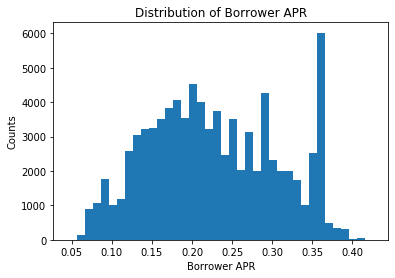

In [23]:
#Plot Histogram for the BorrowerAPR
bins = np.arange(min(df_prosper_loan.BorrowerAPR), max(df_prosper_loan.BorrowerAPR)+0.01, 0.01)
plt.hist(data=df_prosper_loan, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.ylabel('Counts')
plt.title('Distribution of Borrower APR')
plt.show()

##  **Distribution of Loan Original Amount**
>**Loan original amount** has range of 1000 to 35,000. Distribution is **right skewed** with sudden spikes of frequencies for amounts of 5000, 10,000,15,000,20,000,25,000. Loan amount 5000 has been the most frequently applied amount with 14000 applicants. 

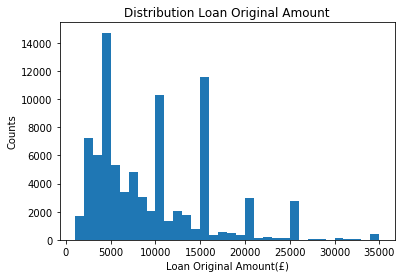

In [24]:
#Plot Histogram for the LoanOriginalAmount
bins = np.arange(min(df_prosper_loan.LoanOriginalAmount), max(df_prosper_loan.LoanOriginalAmount)+1000, 1000)
plt.hist(data=df_prosper_loan, x='LoanOriginalAmount',bins=bins)
plt.xlabel('Loan Original Amount(£)')
plt.ylabel('Counts')
plt.title('Distribution Loan Original Amount')
plt.show()

## **Borrower APR** vs **Prosper Score**.
> It is apparent there is a moderate **negative linear relationship** with the features. Applicants are concenrated in **2-8 range of Prosper Score**. But for a certain Prosper Score there is a variability of **Borrower APR**, which suggests that **Borrower APR** is widely dependant on other given features. 

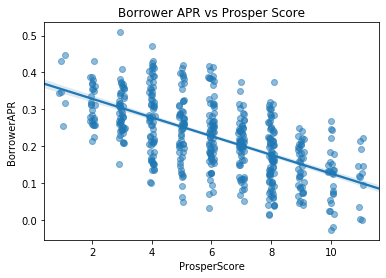

In [25]:
samples = np.random.choice(df_prosper_loan.shape[0], 500, replace = False)
df_sample = df_prosper_loan.iloc[samples,:]
sb.regplot(data = df_sample, x='ProsperScore', y='BorrowerAPR', fit_reg = True,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/2}).set_title('Borrower APR vs Prosper Score')
plt.show()


## Borrower APR vs Loan Original Amount
>There is no obvious linear relationship** between **Borrower APR** and **Loan Original Amount**. But the regplot shows a week **negative correlation**. Again for a certain **Loan original amount**, **Borrower APR** varies among applicants. For instance **Borrower APR** ranges from  0.05 to 0.41 for £1000 loan.

In [26]:
# compute the logarithm of price for other modeling and plotting
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

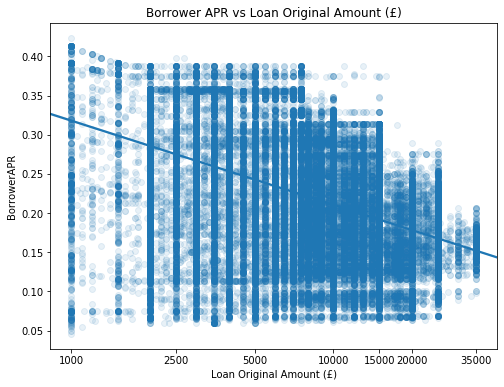

In [27]:
# scatter plot of Borrower APR vs. Loan Origina Amount, with log transform on price axis

plt.figure(figsize = [8, 6])
sb.regplot(df_prosper_loan['LoanOriginalAmount'].apply(log_trans),df_prosper_loan['BorrowerAPR'],scatter_kws = {'alpha' : 0.1})
tick_locs = [1000,2500,5000,10000,15000,20000,35000]
plt.xticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Loan Original Amount (£)')
plt.title('Borrower APR vs Loan Original Amount (£)')
plt.show()

## Borrower APR by Listing Category
>**Auto, Business, Debt Consolidation, Home Improvement and other** types of loan have a comparitively **higher Borrower APR**. Apparently some among these have a lower Borrower APR rate as well for instance **Bussiness loans**. **Baby adaptation and Boat** have a **lower median** rate and **Cosmetic procedure** has a **higher median APR rate**.

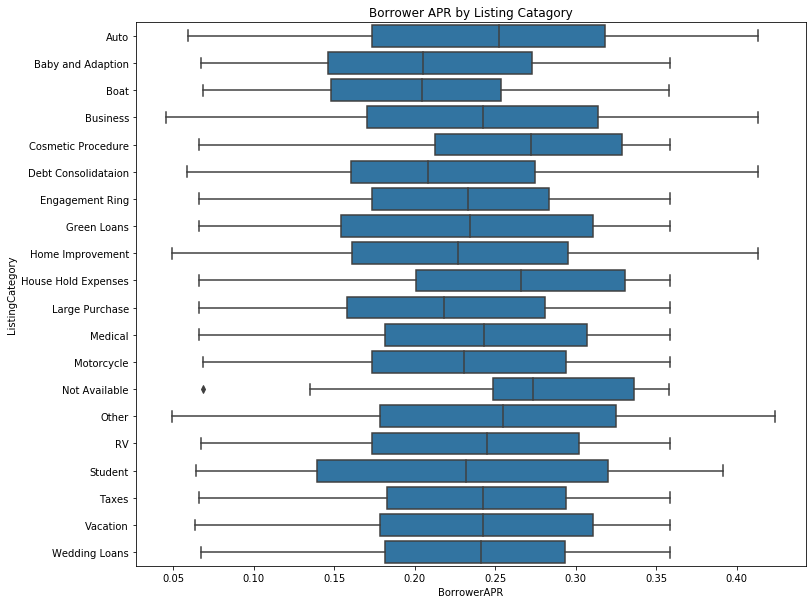

In [28]:
#Plot boxplots for listing Category vs Borrower APR 
fig,axes = plt.subplots(figsize=(12, 10))
base_color = sb.color_palette()[0]
sb.boxplot(y="ListingCategory", x="BorrowerAPR", dodge=False, color = base_color, ax=axes,data = df_prosper_loan).set_title('Borrower APR by Listing Catagory')
plt.show()

## Borrower APR by Loan Status, Employment Status, Incom Range
> **Charged off, Defaulted loans** have been granted with a **higher median Borrower APR** than the other types whereas **current** and **Final payment in progress** have a comparitively **smaller APR rate**.
> Applicants with **Income range more than £100,000** have been granted with a **smaller median APR rate** and applicants who are **not employed** and **£0** income have a **higher APR rate**.
>It is interesting to see **Not Employed, applicant with 0 Income Range** have been granted with a loan with a **higher APR rate.**  I'm interested to further investigate to check their Loanstatus, whether they were able to settle the loan or have any arreas. Also to see their motivation to apply for a loan

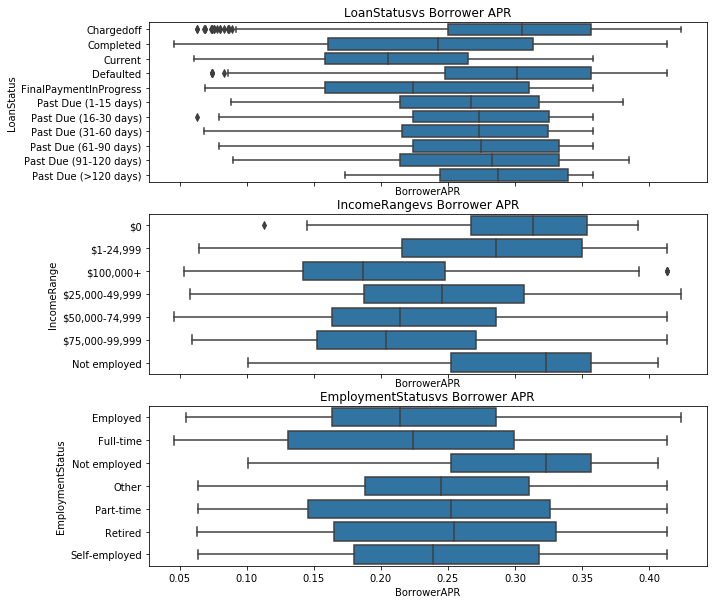

In [29]:
categorical_var = ['LoanStatus','IncomeRange','EmploymentStatus']
#Boxplots for Loanstatus, IncomeRange and EmploymentStatus
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(10, 10), sharex=True, gridspec_kw=dict(hspace=0.2))
for col in range(len(categorical_var)):
    category = categorical_var[col]
    sb.boxplot(y=category, x="BorrowerAPR", dodge=False, ax=axes[col], color=base_color, data = df_prosper_loan).set_title(category+'vs Borrower APR')
plt.show()

## Employment Status by Loan Original Amount
### Let's investigate more to find about: What is the average loan amount a **Not Employee, Retired applicants** granted?
>**Emlpoyed** applicants have borrowed loan for maximum of £35,000 with median of around £10,000. Not employed have borrowed a maximum of £25,000 with a median of around £5000. Interestingly **Not employed** have borrowed a bigger loan amount than those who work for **Part time**. It's suprising to see **Not employees** were able to apply for a bigger amount of loan. It would investigate further in section 3 to see what influence them, may be being a **Home owner**, less **current credit lines** or less **current delinquencies**?

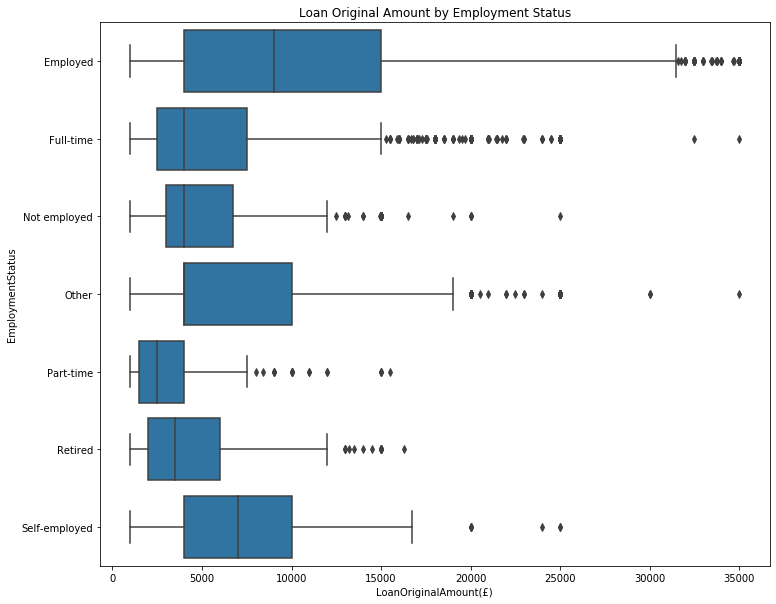

In [30]:
#Create boxplot for Loan Original vs Employment Status
fig,axes = plt.subplots(figsize=(12, 10))
base_color = sb.color_palette()[0]
sb.boxplot(y='EmploymentStatus', x="LoanOriginalAmount", dodge=False, color=base_color, data = df_prosper_loan).set_title('Loan Original Amount by Employment Status')
plt.xlabel("LoanOriginalAmount(£)")
plt.show()


### Change of Borrower APR rate across various types of Employment status with Prosper score and Is Homeowner
>**Part time, Retired, Not employed** linearly correlated **Borrower APR** and **Prosper score relationship**. **APR rate drops** with the **Prosper score increament**. On average **Part time employers** and **Not employer** have a **lower APR rate** when they **don't own a home**. **Employed, Self employed** and **Full time** have a higher rate if they are a **Home owner** and lower rate if they **dont own a home**.

In [31]:
#Change boolean values of IsBorrowerHomeowner 
list_new =[]
""" Iterate through IsBorrowerHomeowner and replace boolean values"""
for rows in df_prosper_loan.IsBorrowerHomeowner:
    if rows:
        list_new.append('HomeOwner')
    else:
        list_new.append('Not HomeOwner')
df_prosper_loan['IsHomeowner']=list_new  

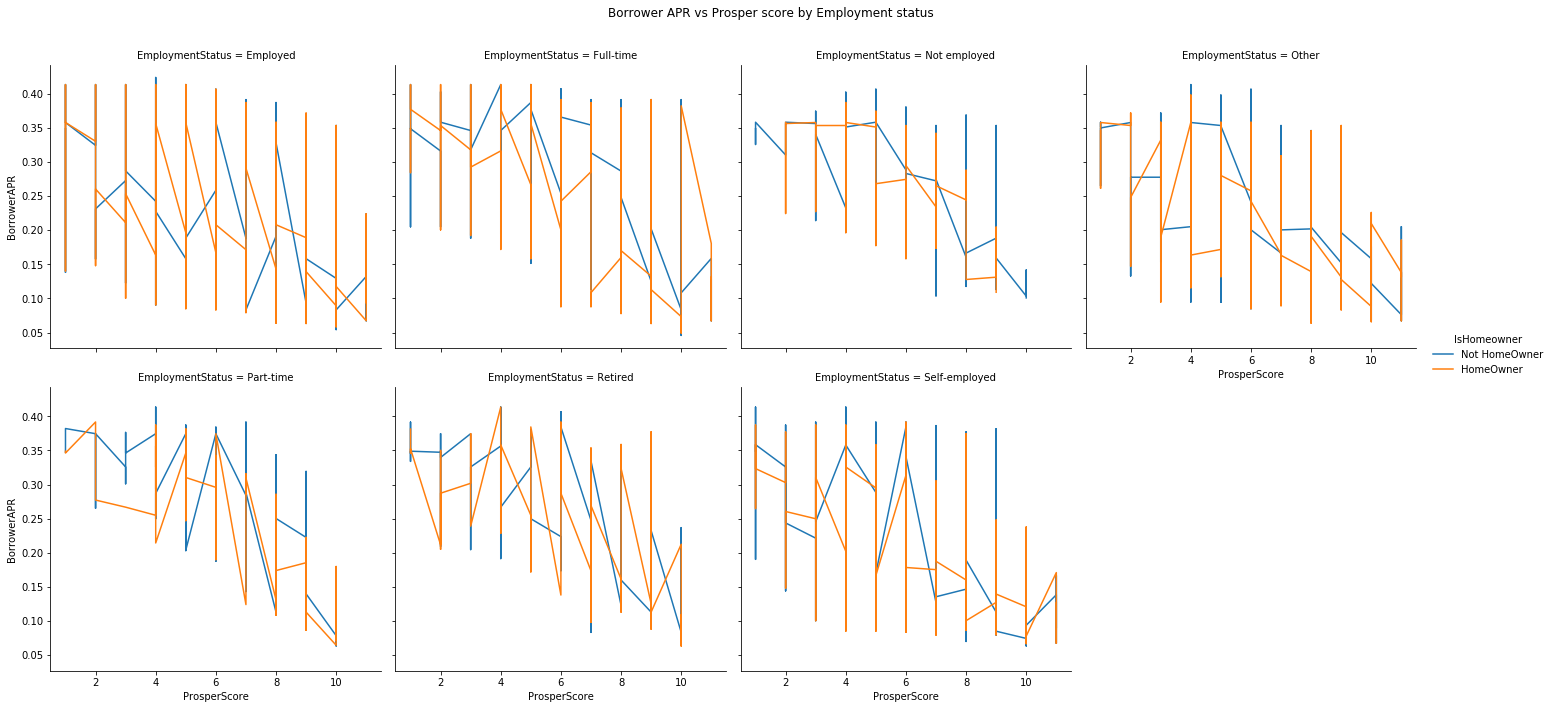

In [32]:
#Create lineplots for Borrower APR vs Prosper Score with Employment status
df_prosper_loan = df_prosper_loan.sort_values('ProsperScore')
g = sb.FacetGrid(df_prosper_loan, col='EmploymentStatus', hue= "IsHomeowner",col_wrap=4, height=5)
g = (g.map(plt.plot,  "ProsperScore","BorrowerAPR").add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Prosper score by Employment status')
plt.show()

## Borrower APR vs Loan Original Amount by Employment Status
>All most all types of Employment status have more applicants in **higher rate of APR** area for **very small** amount of loan. **Not Employed** and **Retired status** have more applicants in **higher rate** for **slightly bigger loan amount**. It is evident **Employed and Full time** workers have borrowed comparitively **larger loan amount** than **Not Employed and Retired**. Interestingly some **Not employees** and **Part time** were able to borrow **larger loan amount for lower APR rate**. Second plot proofs that those **Not employees who borrowed a larger amount were home owners**. 

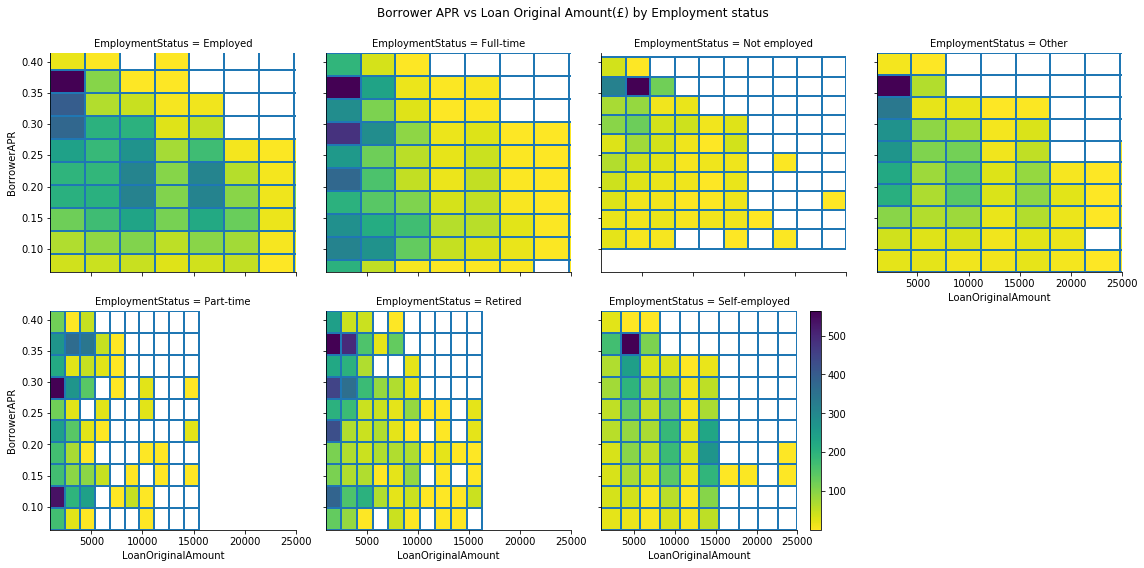

In [33]:
#Creat heatmap for Loan original amount vs APR across Employment status
g = sb.FacetGrid(data = df_prosper_loan, col = 'EmploymentStatus', height = 4.0, col_wrap=4,margin_titles = False)
g.map(plt.hist2d, 'LoanOriginalAmount','BorrowerAPR',cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Loan Original Amount(£) by Employment status')
plt.show()

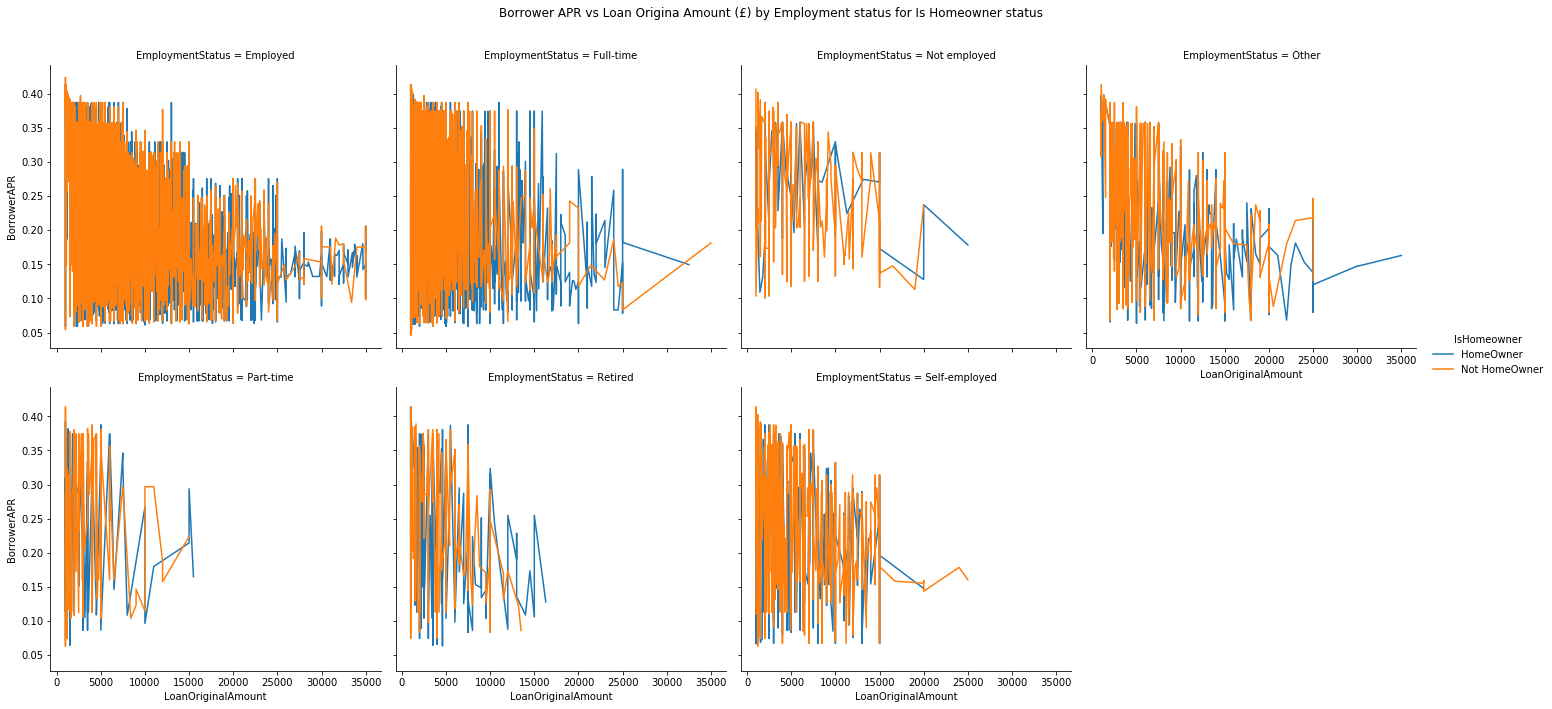

In [34]:
#Create lineplots for Borrower APR vs Prosper Score with Employment status
df_prosper_loan = df_prosper_loan.sort_values('LoanOriginalAmount')
g = sb.FacetGrid(df_prosper_loan, col='EmploymentStatus', hue= "IsHomeowner",col_wrap=4, height=5)
g = (g.map(plt.plot,  "LoanOriginalAmount","BorrowerAPR").add_legend());
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Loan Origina Amount (£) by Employment status for Is Homeowner status')
plt.show()

## Borrower APR vs Loan Inquries by Employment Status
> Comparitively **Not employed** and **Part time** have recieved a **lower APR** for who have current delinquencies of one. **Employed**, **Full time** and **Other** types have a non linear relationship with  **Current delinquencies** whereas **Retired** has **positive linear ralationship**. 

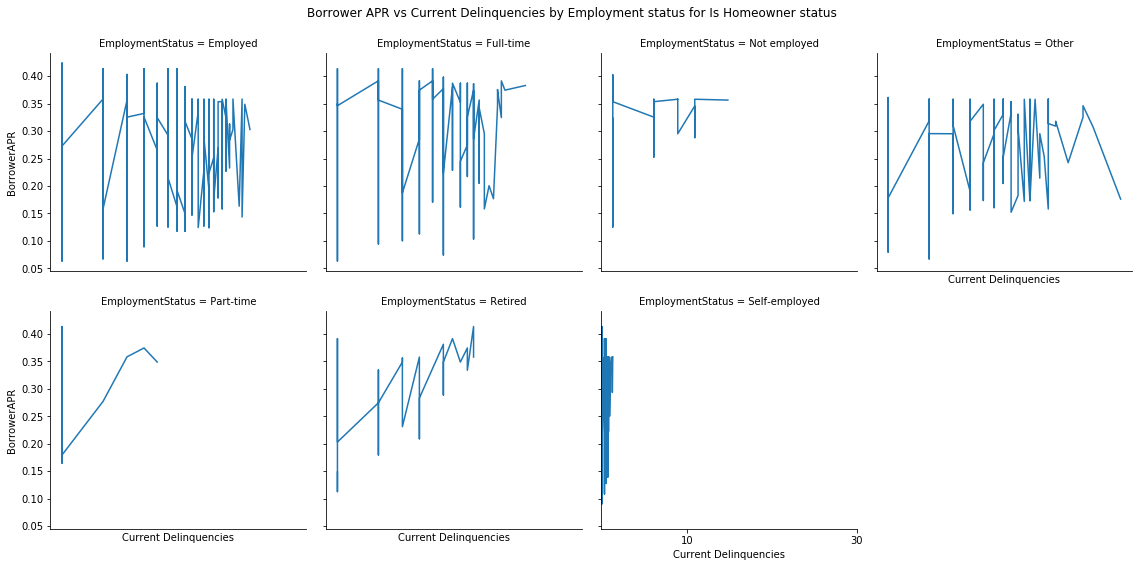

In [21]:
#Create lineplots for Borrower APR vs Current delinquencies for different employment status
df_prosper_loan = df_prosper_loan.sort_values('CurrentDelinquencies')
df_prosper_loan['log_CurrentDelinquencies'] = df_prosper_loan['CurrentDelinquencies'].apply(log_trans)
g = sb.FacetGrid(data = df_prosper_loan, col = 'EmploymentStatus', height = 4, col_wrap=4,
                margin_titles = True)
g.map(plt.plot, 'log_CurrentDelinquencies','BorrowerAPR')
g.set_xlabels('Current Delinquencies')
tick_locs = [10, 30]
plt.xticks(tick_locs, tick_locs)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Current Delinquencies by Employment status for Is Homeowner status')
plt.show()

## Borrower APR vs Loan Status by Employment Status
I'm intrested in looking at whether **Not employees** were able to settle the loan or do they have any **Default** or **Past due** payments? What is the motivation for them to apply for loan?
>**Not Employed Employment Status** has a **larger range** for **Past Due payments** and **Defaulted** loan accounts. **Employed status** have a **less** number of **Defaults** and **Past due** payments comparitively.

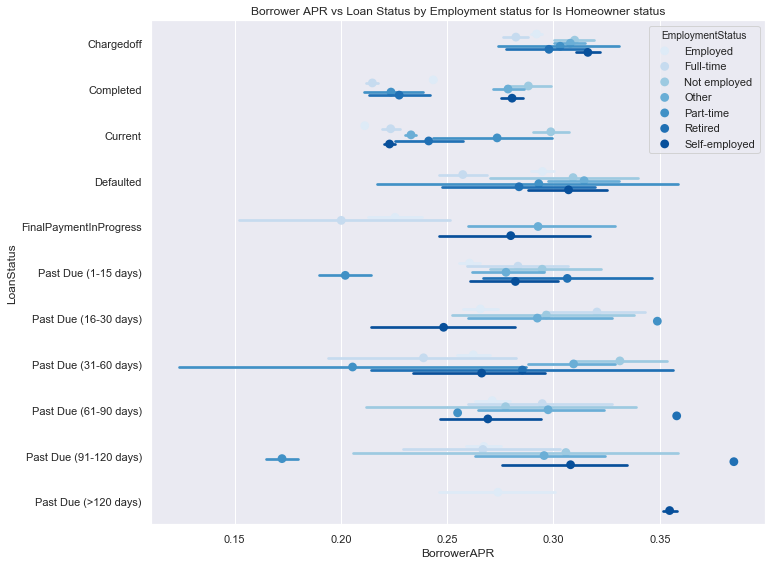

In [22]:
#Create a pointplot for Loan status vs APR across Employment status
sb.set(rc={'figure.figsize':(11.0,8.0)})
sb.pointplot(data = df_prosper_loan, y = 'LoanStatus', x = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.subplots_adjust(top=1.0)
plt.title('Borrower APR vs Loan Status by Employment status for Is Homeowner status')
plt.show()


## Listing Category and Loan Status across Employment Status
> The bar charts below interpret the purposes of loan application for **Not employed, part-time and retired applicants** are mainly for **Debt consolidataion** and **Business** and **other** which makes sense.  
>**Not employees** have comparitvely **higher** number of  charged off loans.


In [36]:
#Method to select levels from categorical variables
def select_data(y,i):
    """quick method to select top value counts levels"""
    list_select=[]
    df_prosper_loan[y] = df_prosper_loan[y].astype(str)
    sorted_counts=df_prosper_loan[y].value_counts().nlargest(i)
   
    for i in range(i):
        list_select.append(sorted_counts.index[i])
     
    df_listing = df_prosper_loan[df_prosper_loan[y]==list_select[0]]
    
    for i in range(1,i):
        df_listing = df_listing.append(df_prosper_loan[df_prosper_loan[y]==list_select[i]])
    
    return df_listing

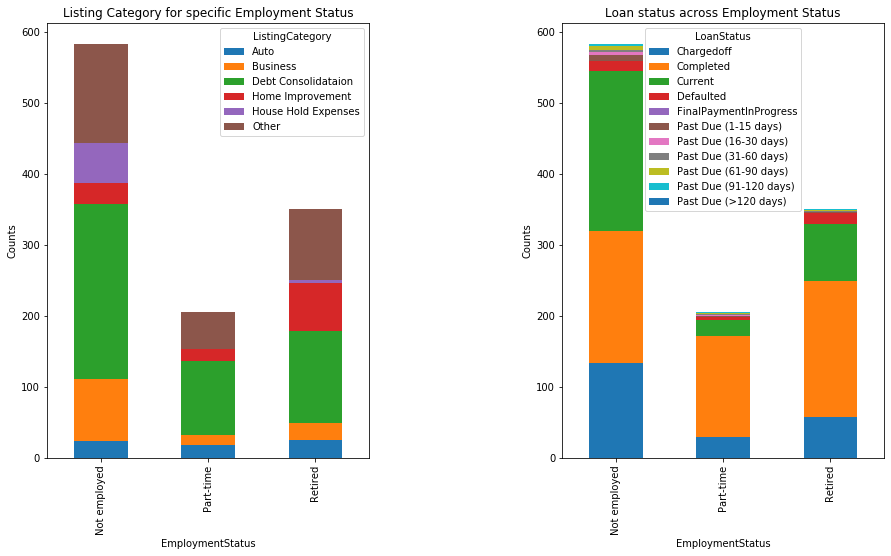

In [46]:
#Create a subset of dataset for Not employed, part time and retired
df_listing = select_data('ListingCategory',7)
df_listing['EmploymentStatus'] = df_listing['EmploymentStatus'].astype(str)
df_listing_new = df_listing[df_listing['EmploymentStatus']=="Not employed"]
df_listing_new = df_listing_new.append(df_listing[df_listing['EmploymentStatus']=="Part-time"])
df_listing_new = df_listing_new.append(df_listing[df_listing['EmploymentStatus']=="Retired"])
df_listing_new.EmploymentStatus.value_counts()

#Create stack bar charts
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 8), sharex=True, gridspec_kw=dict(wspace=0.6))
df_listing_new.groupby(['EmploymentStatus','ListingCategory']).size().unstack().plot(kind='bar',stacked=True,ax=axes[0],title = 'Listing Category for specific Employment Status')
axes[0].set_ylabel('Counts')
df_listing_new.groupby(['EmploymentStatus','LoanStatus']).size().unstack().plot(kind='bar',stacked=True, ax=axes[1],title ='Loan status across Employment Status')
axes[1].set_ylabel('Counts')
plt.show()

## Borrower APR vs Total Inquiries by Employment Status
> **Employed, Full time and Retired** have a strong positive relationship with **Total Inquiries** and **APR rate** whereas **Not employed and Self employed** have **moderate positive correlation**. Interestingly **not owing a home** impact more on **APR** rate for who are **Not employed, Part time and Retired**

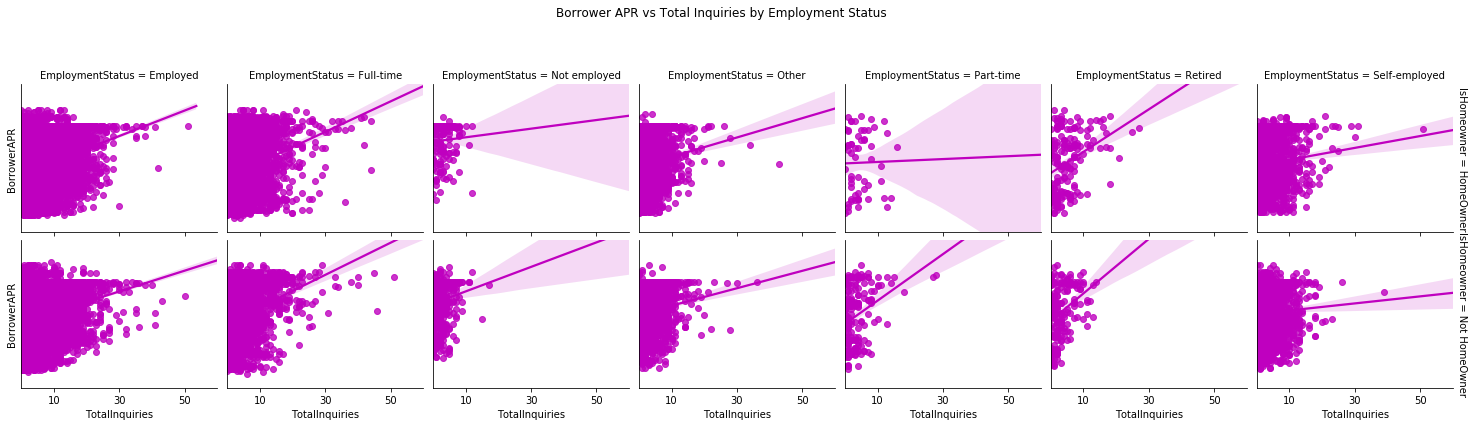

In [47]:
#Scatter for Total inquiries vs APR for different Employment status
g = sb.FacetGrid(df_prosper_loan, col="EmploymentStatus", row="IsHomeowner",
                  margin_titles=True)
g = (g.map(sb.regplot,'TotalInquiries', 'BorrowerAPR', color='m')
      .set(xlim=(0, 60), ylim=(0, 0.5),
           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.05, hspace=.05))
plt.subplots_adjust(top=0.8)
plt.suptitle('Borrower APR vs Total Inquiries by Employment Status')
plt.show()

## Borrower APR vs Listing Category by Employment Status
> **Not employer** have granted loan with a higher **median APR rate** than all other types. Interestingly **Part time** workers manage to get a comparitively **lower APR** rate for **Business** loans. **Retired** people have borrowed median loan for **lower median APR** rate.

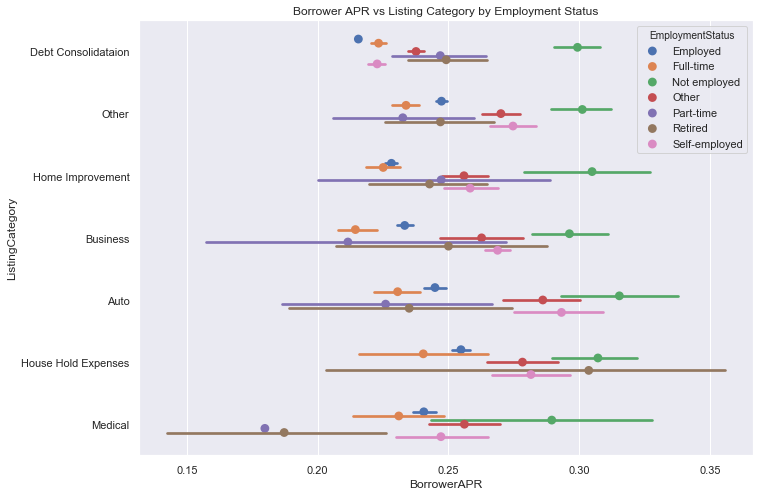

In [51]:
#Create a pointplot for Loan status vs APR across Employment status
df_listing = select_data('ListingCategory',8)
sb.set(rc={'figure.figsize':(11.0,8.0)})
sb.pointplot(data = df_listing, y = 'ListingCategory', x = 'BorrowerAPR', hue = 'EmploymentStatus',
              linestyles = '', dodge = 0.4).set_title('Borrower APR vs Listing Category by Employment Status')
plt.show()

In [53]:
!jupyter nbconvert Prosper_loan_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Prosper_loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 1558437 bytes to Prosper_loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Premila Deva\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Premila Deva\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Premila Deva\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Premila Deva\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Premila Deva\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.conve